# Asignatura: Herramientas para la IA
# Autor: Borja Esteve Molner

## Explicación Datos

El dataset ha sido descargado desde kaggle (https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data).


El conjunto de datos "Heart Disease UCI" es utilizado para tareas de clasificación relacionadas con enfermedades cardíacas. A continuación, se presenta una lista de algunas de las variables incluidas en el conjunto de datos, junto con el tipo de variable:

* Edad (age): Variable numérica continua que representa la edad de los pacientes.
* Sexo (sex): Variable categórica binaria que indica el género del paciente (1 para hombre, 0 para mujer).
* Colesterol total (chol): Variable numérica continua que representa el nivel de colesterol total.
* Presión arterial en reposo (trestbps): Variable numérica continua que indica la presión arterial en reposo.
* Colesterol sérico (serum_cholestoral): Variable numérica continua que representa el nivel de colesterol sérico en mg/dl.
* Nivel de glucosa en ayunas (fbs): Variable categórica binaria que indica si el nivel de glucosa en ayunas es mayor a 120 mg/dl (1 para sí, 0 para no).
* Resultados del electrocardiograma en reposo (restecg): Variable categórica que describe los resultados del electrocardiograma en reposo.
* Frecuencia cardíaca máxima alcanzada (thalach): Variable numérica continua que indica la frecuencia cardíaca máxima alcanzada.
* Angina inducida por ejercicio (exang): Variable categórica binaria que indica si se experimenta angina inducida por ejercicio (1 para sí, 0 para no).
* Depresión del segmento ST inducida por el ejercicio (oldpeak): Variable numérica continua que mide la depresión del segmento ST inducida por el ejercicio.
* Inclinación del segmento ST pico del ejercicio (slope): Variable categórica que describe la pendiente del segmento ST pico del ejercicio.
* Número de vasos principales coloreados por fluoroscopia (ca): Variable numérica discreta que indica el número de vasos principales coloreados por fluoroscopia.
* Tipo de defecto cardíaco (thal): Variable categórica que describe el tipo de defecto cardíaco.
* Presencia de enfermedad cardíaca (target): Variable categórica binaria que indica la presencia (1) o ausencia (0) de enfermedad cardíaca.

## Explicación Pipeline

Podemos dividir el Pipeline en 2 módulos principales: un módulo de EDA (Exploratory Data Analysis) y ETL y otro módulo de entrenamiento de modelos e inferencia.

Se ha intentado hacer el Pipeline lo más 'interactivo' posible, de forma que es el usuario el que tiene que introducir todos los datos por pantalla y prácticamente no hace falta tocar el notebook para introducir las varibales, rutas a archivos, modelos, etc...

### EDA y ETL

En este módulo cargamos los datos mediante una ruta a nuestro csv. También se debe introducir la variable objetivo con el fin de facilitar futuros procesamientos.

Una vez hecho esto, se visualizan unas gráficas (boxplots de cada variable, un heatmap y la distribución de probabilidad de cada variable) con el fin de facilitar al usuario una primera visión de los datos para así poder basar las decisiones del procesamiento en una información previa. De este modo, podremos ver diferentes problemas que sufren nuestros datos de una forma sencilla.

Una vez visualizados los datos, comienza el procesado. Para este punto, se han elegido 5 técnicas:
* Tratamiento de faltantes: Si existen, podemos eliminarlos o imputarlos por media o mediana.
* Tratamiento de duplicados: Si existen, podemos elegir entre eliminarlos o dejarlos.
* Detección de anomalías: Se ha usado un modelo IsolationForest para la detección de anomalías en el dataset, considerando que puede ser un criterio más exacto que simplemente eliminar aquellas observaciones con un Z-score mayor de 3.
* Tratamiento del desbalanceo: Calculamos el desbalanceo como la diferencia absoluta y porcentual entre las observaciones en la clase 1 y 0. Se muestra al usuario que porcentaje de diferencia existe y este puede elegir entre no balancear el dataset, balancearlo mediante la técnica SMOTE, mediante undersampling o oversampling.
* Estandarización: Se le da la opción de estandarizar los datos al usuario. Dado que los datos están en escalas muy diferentes y además se da la opción posterior de aplicar técnicas de reducción de dimensionalidad, es un tratamiento bastante necesario.
* Reducción de dimensionalidad: se ofrece al usuario elegir si quiere o no reducir la dimensionalidad de sus datos. Si elige que si, se le da la opción de seleccionar entre T-sne o PCA y el número de componentes. **NOTA: EN t-sne no me deja elegir más de 4 componentes**


### Modelado

Una vez procesados los datos, se pide al usuario que decida como quiere partir los datos (el porcentaje de datos de test). Después, se dividen los datos en 3 conjuntos: Entrenamiento, validación y test. Con los datos ya preparados, pasamos al modelado:

1. Se da a elegir al usuario que modelo quiere usar de entre: *Random Forest, XGboost, Knn, SVM y regresión logística*. Se han elegido estos modelos por varias razones: sencillez de implementar con scikit-learn, buen rendimiento con un conjunto de datos no muy grande y son clasificadores (nuestra tarea es supervisada de clasificación por lo que necesitamos algoritmos de clasificación).

2. Se le da la opción al usuario de hacer el ajuste de hiperparámetros con Grid Search o Random Search con una lista de valores de los parámetros ya predefinida. Los parámetros elegidos han sido los que subjetivamente me parecen los más importanets y los valores de prueba están acotados a un conjunto 'pequeño' para no alargar demasiado el proceso de entrenamiento.

3. El grid search y el random search se realiza con Cross Validation. Se ha decidido usar Cross Validation por que entrenar modelos de aprendizaje automático sin utilizar técnicas de validación cruzada puede llevar a una evaluación del rendimiento del modelo que no sea representativa de su capacidad para generalizar a datos no vistos. Esto nos da una buena idea de como el modelo se comporta con datos no vistos por lo que si vemos grandes diferencias en cada fold, podemos pensar que el modelo sobreajusta. Para representar el rendimiento por fold y por ajuste, se muestra una gráfica de barras con el rendimiento medio del AUC en el conjunto de validación y con su intervalo de confianza al 95%. Si vemos un intervalo de confianza demasiado grande, podemos pensar que la configuración X ha tenido irregularidades en los diferentes folds y que posiblemente esté sobreajustado. El usuario es el que elige cuantos CV hacer.

4. Una vez hecho esto, se muestran los resultados del mejor modelo en validación, mostrando: La curva ROC, el AUC, la matriz de confusión y el accuracy. Dado que el dataset está desbalanceado y el usuario puede decidir no balancearlo, creo que es importante dar métricas que sean robustas al desbalanceo, como pueden ser el AUC o la curva ROC, ya que el accuracy es bastante sensible al desbalanceo.

5. Después, también se muestra el rendimiento de este mismo modelo en el conjunto test (nunca antes visto) representando las mismas métricas que anteriormente.

6. Después, se da la opción de guardar el modelo. Se debe introducir una ruta acabada con /*nombre_del_modelo.pkl* . Esto lo he creado con el fin de poder reutilizar un modelo ya entrenado.

7. Se da la opción al usuario de realizar inferencia de un nuevo dataset. Para ello:
    * Debe cargar uno de los model *.pkl*
    * Debe introducir la ruta a un archivo csv **SIN ETIQUETA**
    * El módulo devolverá un csv con las predicciones realizadas de los neuvos datos.



In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from joblib import dump
from joblib import load


class PipelineCorazon:
    def __init__(self):
        """
        Inicializa una instancia de la clase PipelineCorazon.

        Atributos:
        - data: DataFrame, almacenará los datos cargados.
        - target_variable: str, almacena el nombre de la variable objetivo.
        - X_train, X_val, X_test: DataFrame, almacenan conjuntos de características.
        - y_train, y_val, y_test: Series, almacenan etiquetas correspondientes a los conjuntos de características.
        - best_model: Almacena el mejor modelo obtenido durante el proceso.
        """
        self.data = None
        self.target_variable = None
        self.X_train = None
        self.X_val = None
        self.X_test = None
        self.y_train = None
        self.y_val = None
        self.y_test = None
        self.best_model = None

    def load_data(self):
        """
        Carga los datos desde un archivo CSV especificado por el usuario.
        """
        csv_path = input("Ingrese la ruta del archivo CSV: ")
        self.data = pd.read_csv(csv_path)
        print("Datos cargados correctamente.")

    def choose_target_variable(self):
        """
        Permite al usuario seleccionar la variable objetivo de los datos.
        """
        print("Columnas disponibles:")
        print(self.data.columns)
        self.target_variable = input("Ingrese el nombre de la variable objetivo: ")

    def visualize_data(self):
        """
        Visualiza los datos mediante un boxplot, un heatmap de correlaciones y histogramas de distribuciones.
        """
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=self.data, orient="h")
        plt.title("Boxplot por Variable")
        plt.show()

        plt.figure(figsize=(12, 8))
        correlation_matrix = self.data.corr()
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
        plt.title("Heatmap de Correlaciones")
        plt.show()

        plt.figure(figsize=(12, 8))
        for column in self.data.columns:
            sns.histplot(self.data[column], kde=True, label=column)
        plt.title("Distribuciones de Probabilidad")
        plt.legend()
        plt.show()

    def handle_missing_values(self):
        """
        Maneja los valores faltantes en los datos utilizando la eliminación o imputación según la elección del usuario.
        """
        missing_count = self.data.isnull().sum().sum()
        print(f"\nNúmero total de valores faltantes: {missing_count}")
        if missing_count > 0:
            action = int(input("¿Desea eliminar los faltantes? (0: No, 1: Sí): "))
            if action == 1:
                self.data.dropna(inplace=True)
            else:
                impute_method = int(input("Seleccione el método de imputación (0: Media, 1: Mediana): "))
                imputer = SimpleImputer(strategy='mean') if impute_method == 0 else SimpleImputer(strategy='median')
                self.data = pd.DataFrame(imputer.fit_transform(self.data), columns=self.data.columns)
        print(f"Shape después de manejar los faltantes: {self.data.shape}")

    def handle_duplicates(self):
        """
        Maneja los duplicados en los datos eliminándolos si el usuario lo elige.
        """
        duplicate_count = self.data.duplicated().sum()
        print(f"\nNúmero total de duplicados: {duplicate_count}")
        if duplicate_count > 0:
            action = int(input("¿Desea eliminar los duplicados? (0: No, 1: Sí): "))
            if action == 1:
                self.data.drop_duplicates(inplace=True)
        print(f"Shape después de eliminar duplicados: {self.data.shape}")

    def detect_and_handle_anomalies(self):
        """
        Detecta y maneja anomalías en los datos utilizando el algoritmo de Isolation Forest.
        """
        isolation_forest = IsolationForest(contamination='auto')
        self.data['anomaly'] = isolation_forest.fit_predict(self.data.drop(columns=[self.target_variable]))
        anomaly_count = (self.data['anomaly'] == -1).sum()
        print(f"\nNúmero total de anómalos detectados: {anomaly_count}")

        anomaly_column = self.data['anomaly'].copy()

        action = int(input("¿Desea eliminar los anómalos? (0: No, 1: Sí): "))
        if action == 1:
            self.data = self.data[self.data['anomaly'] == 1].drop(columns=['anomaly'])
        else:
            self.data['anomaly'] = anomaly_column

        print(f"Shape después de eliminar anómalos: {self.data.shape}")
        print(self.data.columns)

    def handle_class_imbalance(self):
        """
        Aborda el desbalanceo de clases utilizando técnicas como SMOTE, Undersampling u Oversampling.
        """
        class_0_count = (self.data[self.target_variable] == 0).sum()
        class_1_count = (self.data[self.target_variable] == 1).sum()
        imbalance_percentage = abs(class_1_count - class_0_count) / max(class_0_count, class_1_count) * 100
        print(f"\nPorcentaje de desbalanceo: {imbalance_percentage:.2f}%")

        action = int(input("Seleccione la opción para abordar el desbalanceo (0: Nada, 1: SMOTE, 2: Undersampling, 3: Oversampling): "))
        if action == 1:
            smote = SMOTE()
            data_resampled , y_resampled = smote.fit_resample(self.data.drop(columns=[self.target_variable]), self.data[self.target_variable])
        elif action == 2:
            undersampler = RandomUnderSampler()
            data_resampled , y_resampled = undersampler.fit_resample(self.data.drop(columns=[self.target_variable]), self.data[self.target_variable])
        elif action == 3:
            oversampler = RandomOverSampler()
            data_resampled , y_resampled = oversampler.fit_resample(self.data.drop(columns=[self.target_variable]), self.data[self.target_variable])

        self.data = pd.concat([pd.DataFrame(data_resampled), pd.DataFrame(y_resampled, columns=[self.target_variable])], axis=1)

        print(f"Shape después de abordar el desbalanceo: {self.data.shape}")

    def standardize_data(self):
        """
        Estandariza los datos si el usuario lo elige.
        """
        standardize = int(input("¿Desea estandarizar los datos? (0: No, 1: Sí): "))
        if standardize == 1:
            scaler = StandardScaler()
            self.data.iloc[:, :-1] = scaler.fit_transform(self.data.iloc[:, :-1])

    def reduce_dimensionality(self):
        """
        Reduce la dimensionalidad de los datos mediante PCA o t-SNE según la elección del usuario.
        """
        reduce_dimension = int(input("¿Desea reducir la dimensión? (0: No, 1: Sí): "))
        if reduce_dimension == 1:
            method = int(input("Seleccione el método de reducción de dimensión (0: PCA, 1: t-SNE): "))
            n_components = int(input("Ingrese el número de componentes: "))

            target_column = self.data[self.target_variable].copy()

            if method == 0:
                pca = PCA(n_components=n_components)
                reduced_data = pd.DataFrame(pca.fit_transform(self.data.drop(columns=[self.target_variable])), columns=[f'PC{i}' for i in range(1, n_components + 1)])
            else:
                tsne = TSNE(n_components=n_components)
                reduced_data = pd.DataFrame(tsne.fit_transform(self.data.drop(columns=[self.target_variable])), columns=[f't-SNE{i}' for i in range(1, n_components + 1)])

            self.data = pd.concat([reduced_data, target_column], axis=1)

        print(f"Shape después de reducir la dimensión: {self.data.shape}")

    def split_data(self, test_size):
        """
        Divide los datos en conjuntos de entrenamiento, validación y prueba.

        Parámetros:
        - test_size: float, proporción del conjunto de datos que se utilizará como conjunto de prueba.
        """
        features = self.data.drop(columns=[self.target_variable])
        target = self.data[self.target_variable]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(features, target, test_size=test_size, random_state=42)
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(self.X_train, self.y_train, test_size=0.2, random_state=42)

    def train_model(self, model_name, cv_type, cv_folds):
        """
        Entrena un modelo especificado utilizando validación cruzada.

        Parámetros:
        - model_name: str, nombre del modelo a entrenar ('knn', 'xgboost', 'random_forest', 'logistic_regression', 'svm').
        - cv_type: str, tipo de validación cruzada ('grid' o 'random').
        - cv_folds: int, número de divisiones para la validación cruzada.
        """
        models = {
            'knn': KNeighborsClassifier(),
            'xgboost': XGBClassifier(),
            'random_forest': RandomForestClassifier(),
            'logistic_regression': LogisticRegression(),
            'svm': SVC(probability=True)
        }
        model = models[model_name]

        if cv_type == 'grid':
            param_grid = self.get_parameter_grid(model_name)
            cv = GridSearchCV(model, param_grid, cv=cv_folds, scoring='roc_auc', n_jobs=-1)
        elif cv_type == 'random':
            param_dist = self.get_parameter_dist(model_name)
            cv = RandomizedSearchCV(model, param_dist, cv=cv_folds, scoring='roc_auc', n_jobs=-1, n_iter=10, random_state=42)
        else:
            raise ValueError("Invalid CV type. Use 'grid' or 'random'.")

        cv.fit(self.X_train, self.y_train)
        self.best_model = cv.best_estimator_


        self.plot_cv_results(cv.cv_results_, model_name, cv_folds)

    def get_parameter_grid(self, model_name):
        """
        Obtiene la cuadrícula de parámetros para la búsqueda de cuadrícula de un modelo específico.

        Parámetros:
        - model_name: str, nombre del modelo ('knn', 'xgboost', 'random_forest', 'logistic_regression', 'svm').

        Retorna:
        - param_grid: dict, cuadrícula de parámetros para la búsqueda de cuadrícula.
        """
        param_grid = {}
        if model_name == 'knn':
            param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
        elif model_name == 'xgboost':
            param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2],
                          'max_depth': [3, 4, 5], 'subsample': [0.8, 0.9, 1.0]}
        elif model_name == 'random_forest':
            param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20],
                          'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
        elif model_name == 'logistic_regression':
            param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none']}
        elif model_name == 'svm':
            param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                          'gamma': ['scale', 'auto']}

        return param_grid


    def get_parameter_dist(self, model_name):
        """
        Obtiene la distribución de parámetros para la búsqueda aleatoria de un modelo específico.

        Parámetros:
        - model_name: str, nombre del modelo ('knn', 'xgboost', 'random_forest', 'logistic_regression', 'svm').

        Retorna:
        - param_dist: dict, distribución de parámetros para la búsqueda aleatoria.
        """
        param_dist = {}
        if model_name == 'knn':
            param_dist = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
        elif model_name == 'xgboost':
            param_dist = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2],
                          'max_depth': [3, 4, 5], 'subsample': [0.8, 0.9, 1.0]}
        elif model_name == 'random_forest':
            param_dist = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20],
                          'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
        elif model_name == 'logistic_regression':
            param_dist = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none']}
        elif model_name == 'svm':
            param_dist = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                          'gamma': ['scale', 'auto']}

        return param_dist

    def plot_cv_results(self, cv_results, model_name, cv_folds):
        """
        Grafica los resultados de la validación cruzada para un modelo específico.

        Parámetros:
        - cv_results: dict, resultados de la validación cruzada.
        - model_name: str, nombre del modelo ('knn', 'xgboost', 'random_forest', 'logistic_regression', 'svm').
        - cv_folds: int, número de divisiones para la validación cruzada.
        """

        mean_test_scores = cv_results['mean_test_score']
        std_test_scores = cv_results['std_test_score']
        params = cv_results['params']

        bar_width = 0.35
        index = range(len(mean_test_scores))

        plt.figure(figsize=(12, 6))
        plt.bar(index, mean_test_scores, yerr=std_test_scores, capsize=5, width=bar_width, label='Test', alpha=0.7)
        plt.xticks([i for i in index], [str(p) for p in params], rotation=45, ha='right')
        plt.xlabel('Configuraciones')
        plt.ylabel('AUC (Mean Test Score)')
        plt.title(f'Rendimiento de la Validación Cruzada para {model_name} ({cv_folds}-fold)')
        plt.legend()
        plt.show()

    def evaluate_best_model(self):
        """
        Evalúa el rendimiento del mejor modelo en el conjunto de validación.

        Muestra la curva ROC, la matriz de confusión y la precisión en el conjunto de validación.
        """
        y_val_prob = self.best_model.predict_proba(self.X_val)[:, 1]

        fpr, tpr, _ = roc_curve(self.y_val, y_val_prob)
        auc_score = auc(fpr, tpr)
        plt.figure(figsize=(8, 8))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc='lower right')
        plt.show()

        y_val_pred = self.best_model.predict(self.X_val)
        cm = confusion_matrix(self.y_val, y_val_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title('Confusion Matrix (Validation Set)')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        accuracy = accuracy_score(self.y_val, y_val_pred)
        print(f'Accuracy on validation set: {accuracy:.2%}')

        self.auc_score = auc_score

    def predict_test_set(self):
        """
        Realiza predicciones en el conjunto de prueba utilizando el mejor modelo.

        Muestra la curva ROC, la matriz de confusión y la precisión en el conjunto de prueba.
        """
        y_test_prob = self.best_model.predict_proba(self.X_test)[:, 1]

        fpr, tpr, _ = roc_curve(self.y_test, y_test_prob)
        auc_score = auc(fpr, tpr)
        plt.figure(figsize=(8, 8))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (Test Set)')
        plt.legend(loc='lower right')
        plt.show()

        y_test_pred = self.best_model.predict(self.X_test)
        cm = confusion_matrix(self.y_test, y_test_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title('Confusion Matrix (Test Set)')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        accuracy = accuracy_score(self.y_test, y_test_pred)
        print(f'Accuracy on test set: {accuracy:.2%}')

    def save_model(self):
        """
        Guarda el mejor modelo entrenado en un archivo especificado por el usuario.
        """
        save_model = input("¿Desea guardar el modelo entrenado? (0: No, 1: Sí): ")
        if save_model == '1':
            model_path = input("Ingrese la ruta para guardar el modelo (con extensión .pkl): ")
            dump(self.best_model, model_path)
            print(f"Modelo guardado correctamente en {model_path}")

    def load_and_predict(self, model_path, test_csv_path):
        """
        Carga un modelo previamente guardado y realiza predicciones en un conjunto de prueba.

        Parámetros:
        - model_path: str, ruta del archivo que contiene el modelo entrenado.
        - test_csv_path: str, ruta del archivo CSV que contiene el conjunto de prueba.
        """
        print('Entrando al modulo load')
        model = load(model_path)
        print('Cargado modelo')

        test_data = pd.read_csv(test_csv_path, sep = ';')
        print('Cargado dataset')
        #print(test_data)

        self.data = test_data

        scaler = StandardScaler()
        self.data = scaler.fit_transform(self.data)

        reduce_dimension = int(input("¿Desea reducir la dimensión? (0: No, 1: Sí): "))
        if reduce_dimension == 1:
            method = int(input("Seleccione el método de reducción de dimensión (0: PCA, 1: t-SNE): "))
            n_components = int(input("Ingrese el número de componentes: "))

            if method == 0:
                pca = PCA(n_components=n_components)
                reduced_data = pd.DataFrame(pca.fit_transform(self.data), columns=[f'PC{i}' for i in range(1, n_components + 1)])
            else:
                tsne = TSNE(n_components=n_components)
                reduced_data = pd.DataFrame(tsne.fit_transform(self.data), columns=[f't-SNE{i}' for i in range(1, n_components + 1)])


            self.data = reduced_data

        print(f"Shape después de reducir la dimensión: {self.data.shape}")

        test_data = self.data

        test_predictions = model.predict(test_data)


        predictions_df = pd.DataFrame({'Predictions': test_predictions})
        predictions_df.to_csv('test_predictions.csv', index=False)
        print("Predicciones guardadas en 'test_predictions.csv'.")

    def preprocesado(self):
        """
        Realiza el proceso completo de preprocesamiento de datos.

        Carga datos, elige la variable objetivo, visualiza los datos, maneja valores faltantes, duplicados, anomalías,
        desbalanceo de clases, estandarización y reducción de dimensionalidad. Finalmente, visualiza los datos después del preprocesamiento.
        """
        self.load_data()
        self.choose_target_variable()
        self.visualize_data()

        self.handle_missing_values()
        self.handle_duplicates()
        self.detect_and_handle_anomalies()
        self.handle_class_imbalance()
        self.standardize_data()
        self.reduce_dimensionality()

        self.visualize_data()



Ingrese la ruta del archivo CSV: heart.csv
Datos cargados correctamente.
Columnas disponibles:
Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')
Ingrese el nombre de la variable objetivo: output


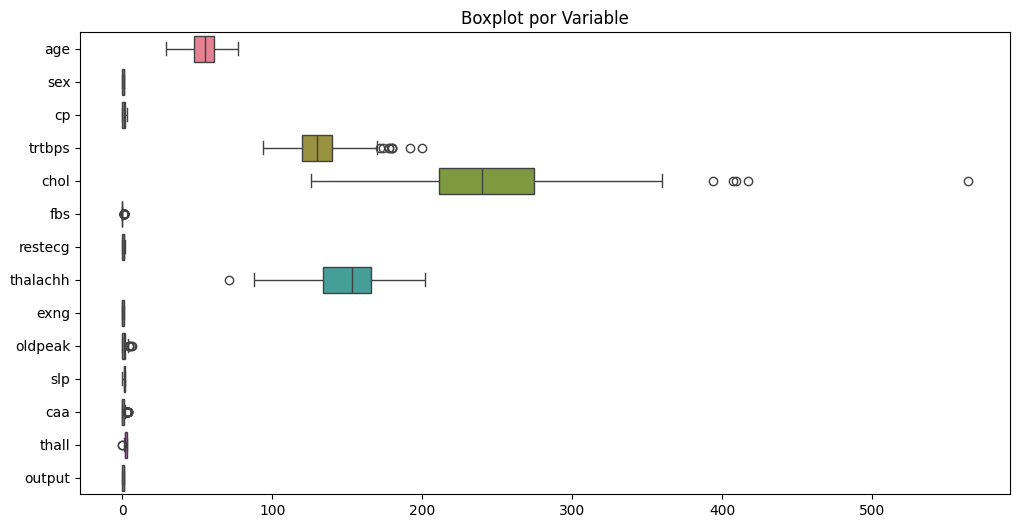

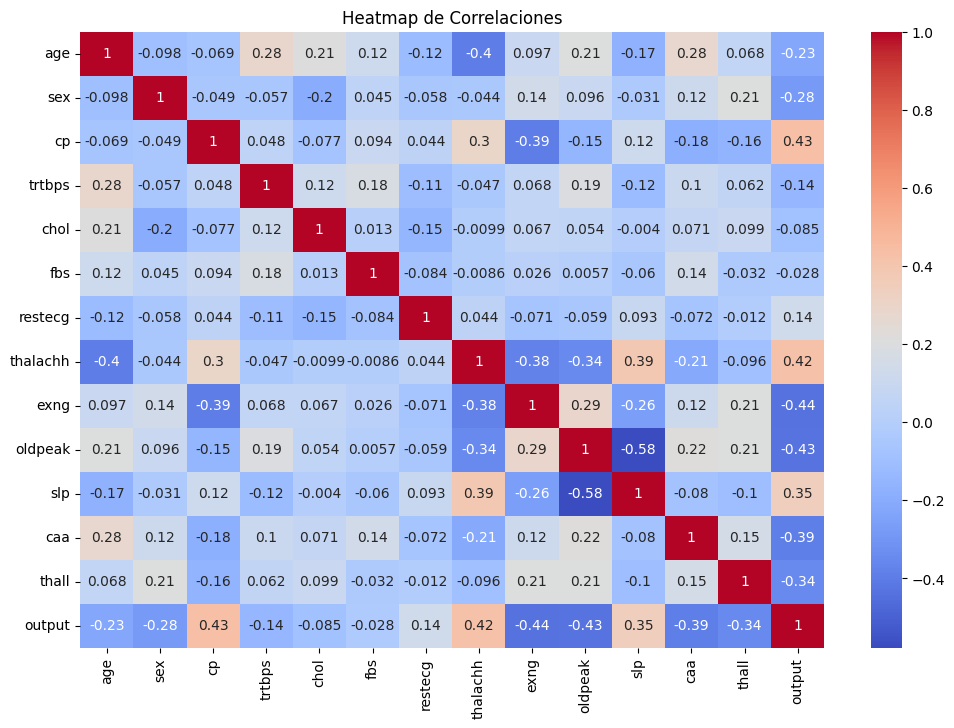

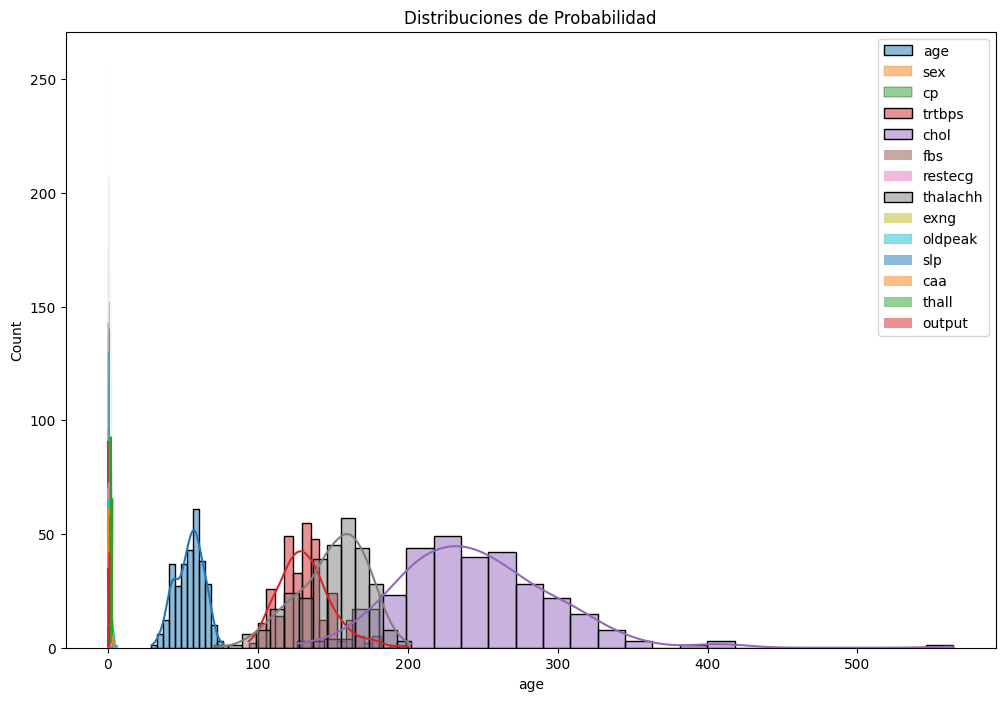


Número total de valores faltantes: 0
Shape después de manejar los faltantes: (303, 14)

Número total de duplicados: 1
¿Desea eliminar los duplicados? (0: No, 1: Sí): 1
Shape después de eliminar duplicados: (302, 14)

Número total de anómalos detectados: 74
¿Desea eliminar los anómalos? (0: No, 1: Sí): 1
Shape después de eliminar anómalos: (228, 14)
Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

Porcentaje de desbalanceo: 25.95%
Seleccione la opción para abordar el desbalanceo (0: Nada, 1: SMOTE, 2: Undersampling, 3: Oversampling): 1
Shape después de abordar el desbalanceo: (262, 14)
¿Desea estandarizar los datos? (0: No, 1: Sí): 1
¿Desea reducir la dimensión? (0: No, 1: Sí): 1
Seleccione el método de reducción de dimensión (0: PCA, 1: t-SNE): 0
Ingrese el número de componentes: 10
Shape después de reducir la dimensión: (262, 11)


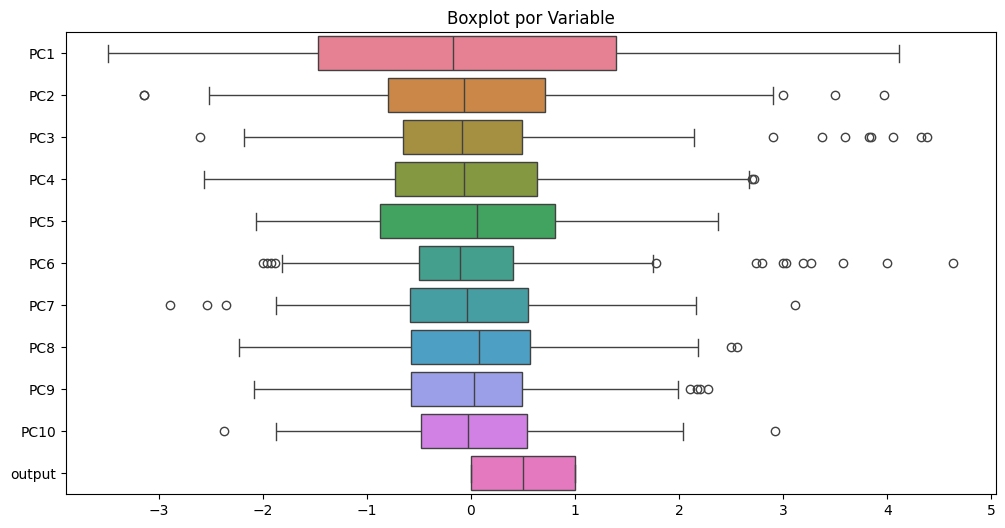

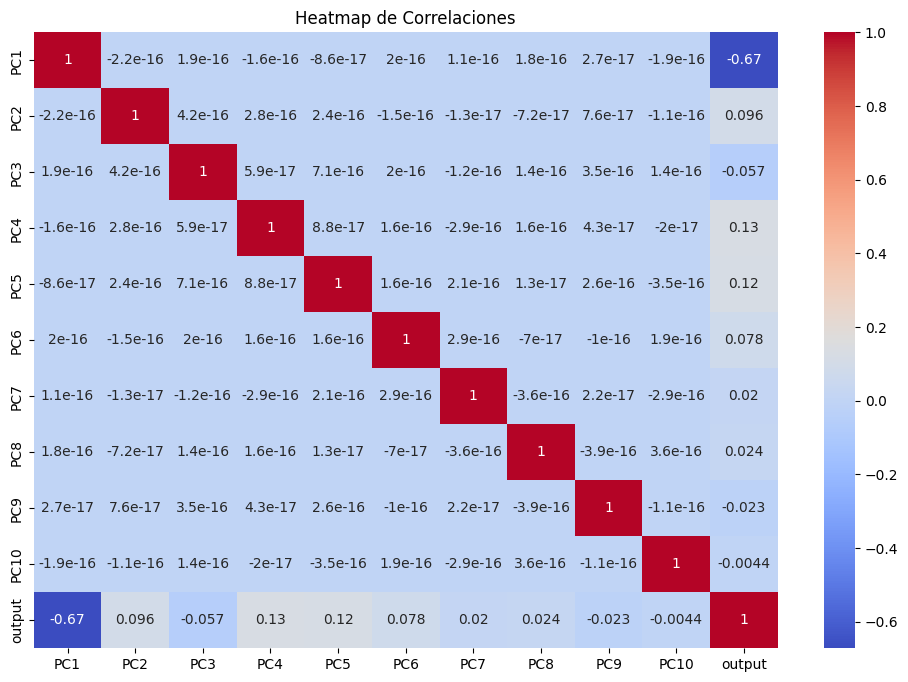

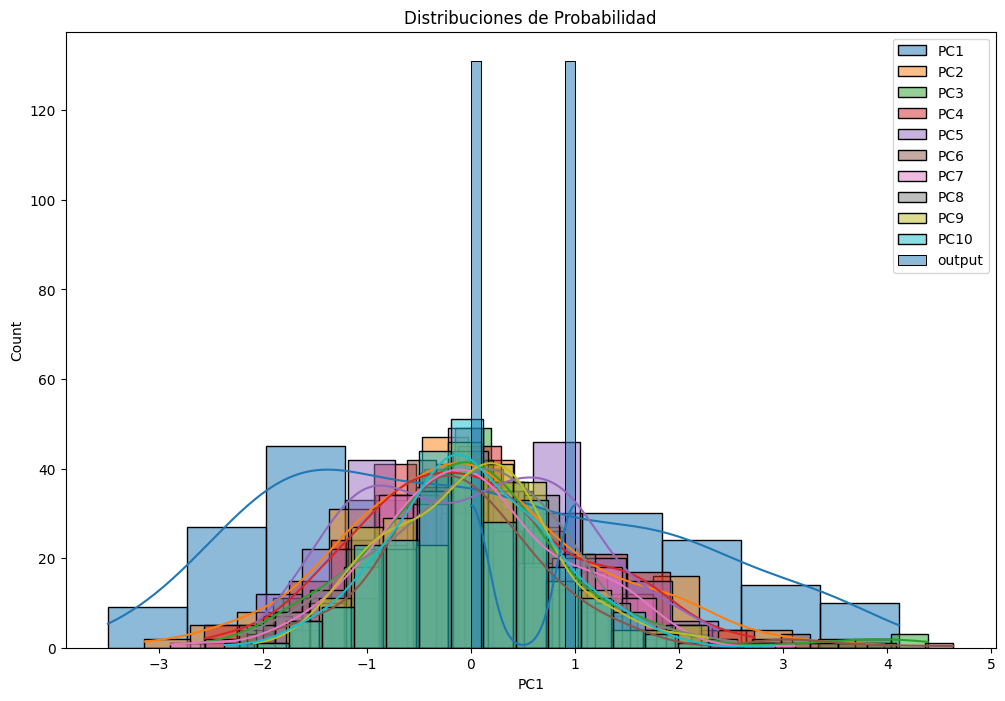

Ingrese el porcentaje de datos para el conjunto de test (entre 0 y 1): 0.2
Ingrese el nombre del modelo (knn, xgboost, random_forest, logistic_regression, svm): knn
Ingrese el tipo de CV (grid o random): grid
Ingrese el número de folds para la validación cruzada: 14


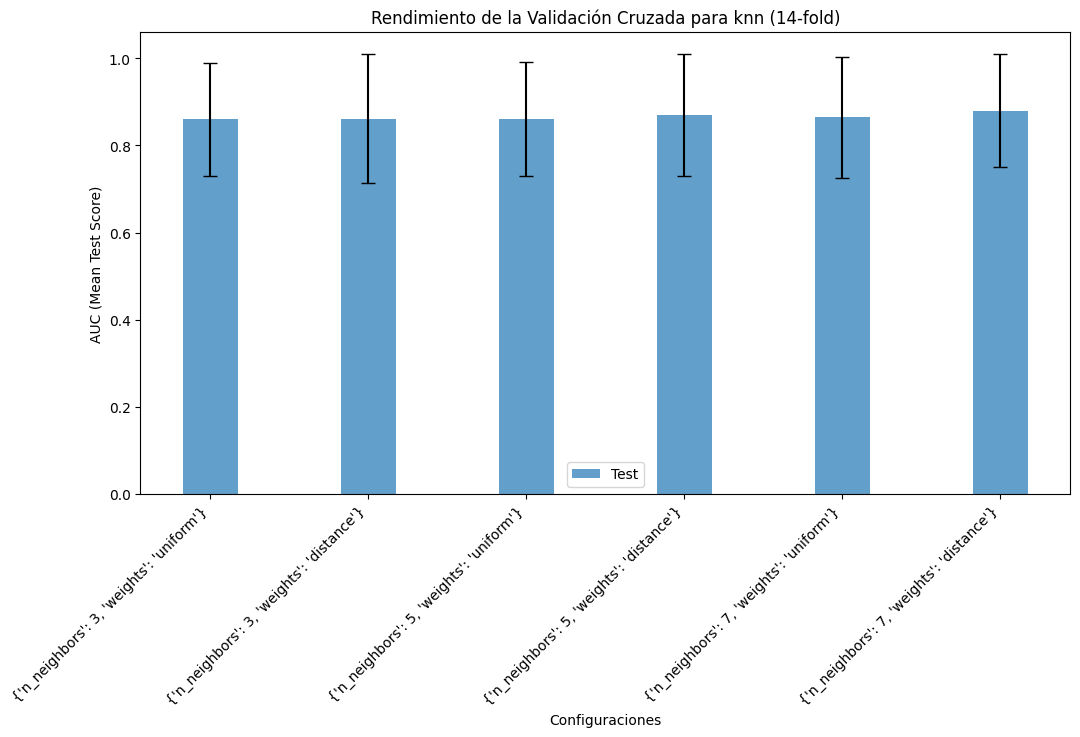

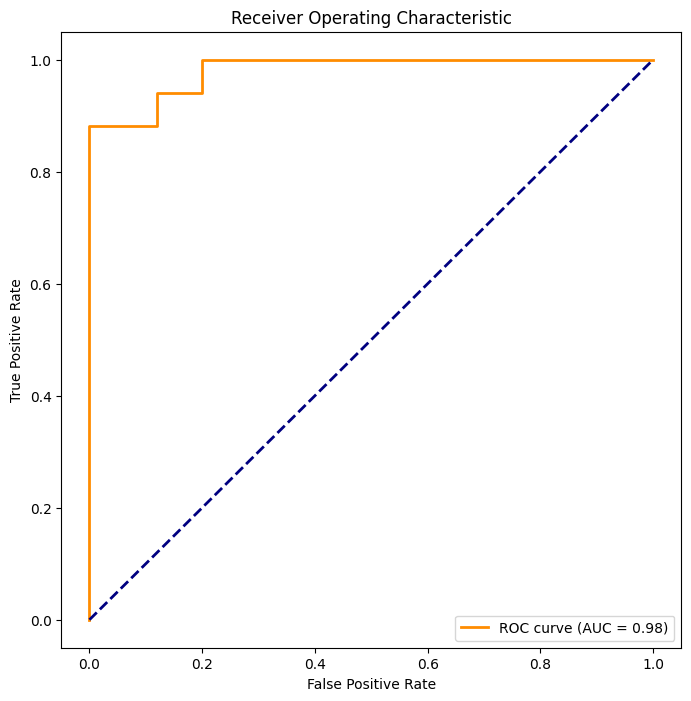

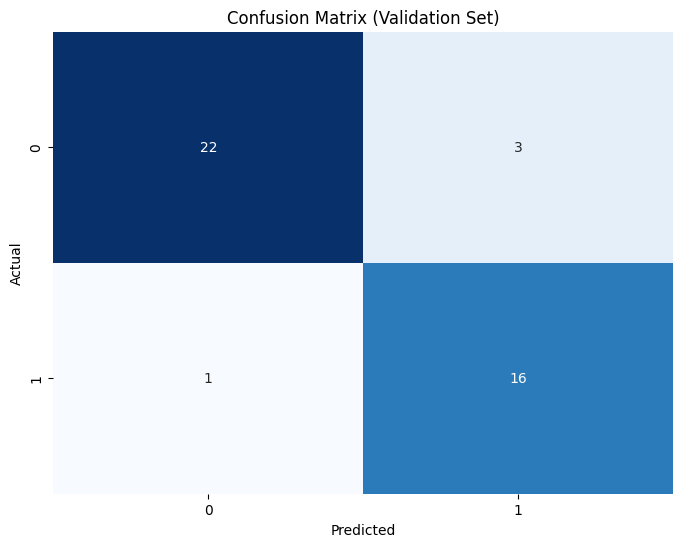

Accuracy on validation set: 90.48%


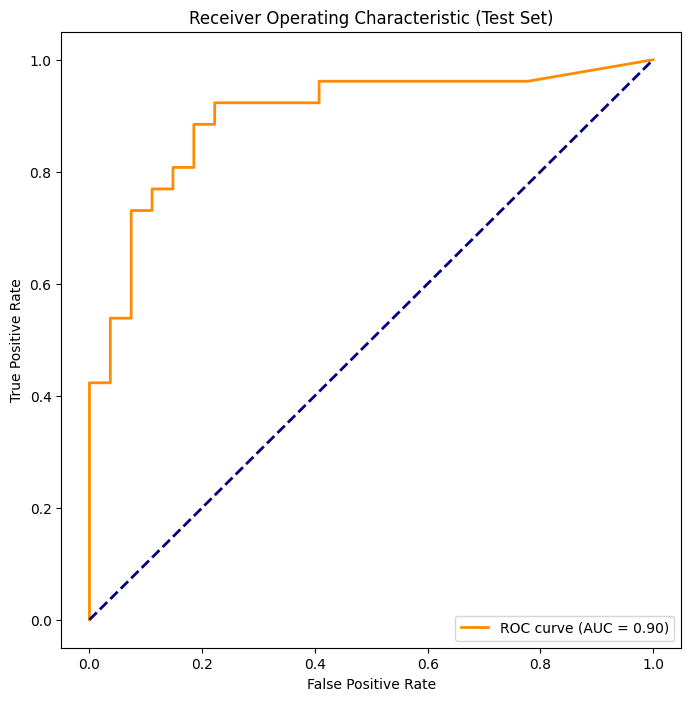

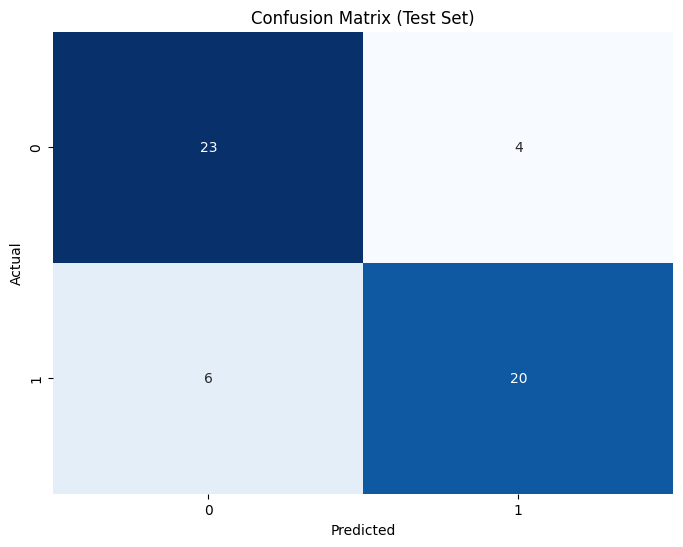

Accuracy on test set: 81.13%
¿Desea guardar el modelo entrenado? (0: No, 1: Sí): 1
Ingrese la ruta para guardar el modelo (con extensión .pkl): knn3.pkl
Modelo guardado correctamente en knn3.pkl
¿Desea cargar y usar un modelo existente para realizar predicciones en un conjunto de test? (0: No, 1: Sí): 1
Ingrese la ruta del modelo entrenado (con extensión .pkl): knn3.pkl
Ingrese la ruta del conjunto de test (sin etiquetas) en formato CSV: test.csv
Entrando al modulo load
Cargado modelo
Cargado dataset
¿Desea reducir la dimensión? (0: No, 1: Sí): 1
Seleccione el método de reducción de dimensión (0: PCA, 1: t-SNE): 0
Ingrese el número de componentes: 10
Shape después de reducir la dimensión: (62, 10)
Predicciones guardadas en 'test_predictions.csv'.


In [68]:
if __name__ == "__main__":
    pipeline = PipelineCorazon()
    pipeline.preprocesado()

    test_size = float(input("Ingrese el porcentaje de datos para el conjunto de test (entre 0 y 1): "))
    pipeline.split_data(test_size)

    model_name = input("Ingrese el nombre del modelo (knn, xgboost, random_forest, logistic_regression, svm): ")
    cv_type = input("Ingrese el tipo de CV (grid o random): ")
    cv_folds = int(input("Ingrese el número de folds para la validación cruzada: "))

    pipeline.train_model(model_name, cv_type, cv_folds)
    pipeline.evaluate_best_model()
    pipeline.predict_test_set()

    pipeline.save_model()

    load_model = input("¿Desea cargar y usar un modelo existente para realizar predicciones en un conjunto de test? (0: No, 1: Sí): ")
    if load_model == '1':
        model_path = input("Ingrese la ruta del modelo entrenado (con extensión .pkl): ")
        test_csv_path = input("Ingrese la ruta del conjunto de test (sin etiquetas) en formato CSV: ")
        pipeline.load_and_predict(model_path, test_csv_path)